# Deep Learning 

In this notebook, we'll go through the code to create your very first neural network to predict whether the house price is below or above median value. We will go through the following in this notebook:

- Exploring and Processing the Data
- Building and Training our Neural Network
- Visualizing Loss and Accuracy
- Adding Regularization to our Neural Network

The code is annotated throughout the notebook and you simply need to download the dataset [here](https://drive.google.com/file/d/1GfvKA0qznNVknghV4botnNxyH-KvODOC/view), put the dataset in the same folder as this notebook and run the code cells below. 

**Before we code any ML algorithm, the first thing we need to do is to put our data in a format that the algorithm will want. In particular, we need to:**

- Read in the CSV (comma separated values) file and convert them to arrays. Arrays are a data format that our algorithm can process.
- Split our dataset into the input features (which we call x) and the label (which we call y).
- Scale the data (we call this normalization) so that the input features have similar orders of magnitude.
- Split our dataset into the training set, the validation set and the test set.

# Exploring and Processing the Data

We first have to read in the CSV file that we've been given. We'll use a package called pandas for that:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


Here, you can explore the data a little. We have our input features in the first ten columns:

- Lot Area (in sq ft)
- Overall Quality (scale from 1 to 10)
- Overall Condition (scale from 1 to 10)
- Total Basement Area (in sq ft)
- Number of Full Bathrooms
- Number of Half Bathrooms
- Number of Bedrooms above ground
- Total Number of Rooms above ground
- Number of Fireplaces
- Garage Area (in sq ft)


In our last column, we have **the feature that we would like to predict:**

**Is the house price above the median or not? (1 for yes and 0 for no)**


The dataset that we have now is in what we call a pandas dataframe. To convert it to an array, simply access its values:

In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

Now, we split the dataset into our input features and the label we wish to predict.

We now split our dataset into input features (X) and the feature we wish to predict (Y). To do that split, we simply assign the first 10 columns of our array to a variable called X and the last column of our array to a variable called Y. 

The code to do the first assignment is this:

In [6]:
X = dataset[:,0:10]
Y = dataset[:,10]

Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [7]:
from sklearn import preprocessing

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [9]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

Lastly, we wish to set aside some parts of our dataset for a validation set and a test set. We use the function train_test_split from scikit-learn to do that.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [12]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In summary, we now have a total of six variables for our datasets we will use:

- X_train (10 input features, 70% of full dataset)
- X_val (10 input features, 15% of full dataset)
- X_test (10 input features, 15% of full dataset)
- Y_train (1 label, 70% of full dataset)
- Y_val (1 label, 15% of full dataset)
- Y_test (1 label, 15% of full dataset)

In [13]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


# Building and Training Our First Neural Network

We will be using Keras to build our architecture. Let's import the code from Keras that we will need to use:

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. Our neural network has three layers:

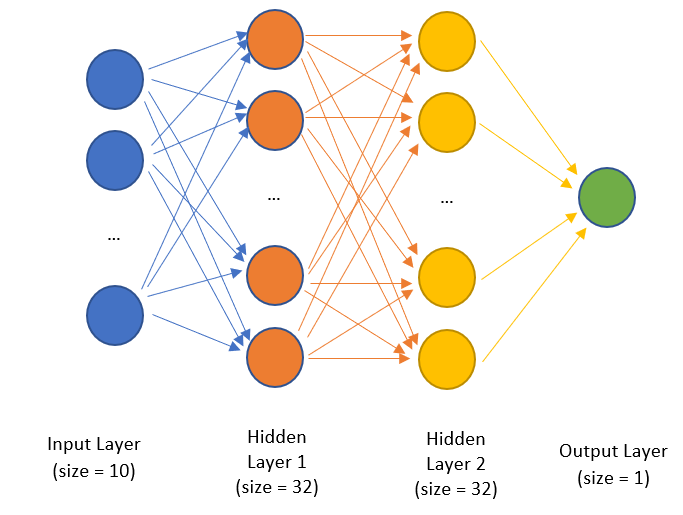

- Hidden layer 1: 32 neurons, ReLU activation
- Hidden layer 2: 32 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [15]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Now that we've got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by
- Telling it what algorithm you want to use to do the optimization (we'll use stochastic gradient descent)
- Telling it what loss function to use (for binary classification, we will use binary cross entropy)
- Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well)

We do so below:

In [16]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training on the data is pretty straightforward and requires us to write one line of code. The function is called 'fit' as we are fitting the parameters to the data. We specify:
- what data we are training on, which is X_train and Y_train
- the size of our mini-batch 
- how long we want to train it for (epochs)
- what our validation data is so that the model will tell us how we are doing on the validation data at each point.

This function will output a history, which we save under the variable hist. We'll use this variable a little later.

In [17]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 12ms/step - loss: 0.6874 - accuracy: 0.4980 - val_loss: 0.6828 - val_accuracy: 0.5205
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6806 - accuracy: 0.4980 - val_loss: 0.6759 - val_accuracy: 0.5251
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6740 - accuracy: 0.5196 - val_loss: 0.6690 - val_accuracy: 0.5342
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6674 - accuracy: 0.5509 - val_loss: 0.6624 - val_accuracy: 0.5753
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6611 - accuracy: 0.6204 - val_loss: 0.6560 - val_accuracy: 0.6256
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6549 - accuracy: 0.6800 - val_loss: 0.6495 - val_accuracy: 0.6941
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6485 - accuracy: 0.6908 - val_loss: 0.6430 - val_accuracy: 0.7123
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3299 - accuracy: 0.8796 - val_loss: 0.3237 - val_accuracy: 0.8584
Epoch 60/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3276 - accuracy: 0.8806 - val_loss: 0.3241 - val_accuracy: 0.8676
Epoch 61/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3270 - accuracy: 0.8787 - val_loss: 0.3215 - val_accuracy: 0.8630
Epoch 62/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3255 - accuracy: 0.8806 - val_loss: 0.3195 - val_accuracy: 0.8584
Epoch 63/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3241 - accuracy: 0.8836 - val_loss: 0.3176 - val_accuracy: 0.8676
Epoch 64/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3224 - accuracy: 0.8757 - val_loss: 0.3164 - val_accuracy: 0.8676
Epoch 65/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3208 - accuracy: 0.8777 - val_loss: 0.3162 - val_accuracy: 0.8676
Epoch 

Evaluating our data on the test set:

In [18]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.2590 - accuracy: 0.9041


0.9041095972061157

# Visualizing Loss and Accuracy

Import the relevant package we need to do the visualization

In [19]:
import matplotlib.pyplot as plt

We want to visualize the training loss and the validation loss like this:

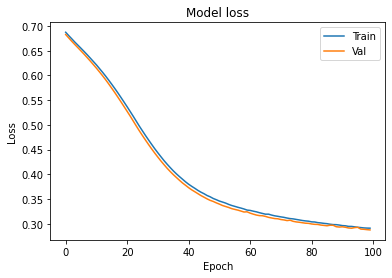

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

We can also visualize the training accuracy and the validation accuracy like this:

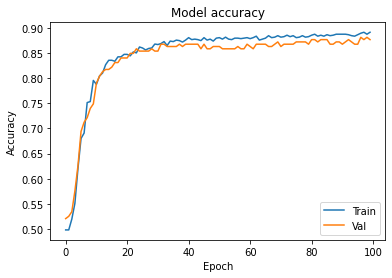

In [21]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Adding Regularization to our Neural Network

We'll train a model which will overfit, which we call Model 2. This might take a few minutes.

In [22]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 34ms/step - loss: 0.4531 - accuracy: 0.7828 - val_loss: 0.3352 - val_accuracy: 0.8539
Epoch 2/100
32/32 [==============================] - 1s 25ms/step - loss: 0.3538 - accuracy: 0.8650 - val_loss: 0.3154 - val_accuracy: 0.8493
Epoch 3/100
32/32 [==============================] - 1s 25ms/step - loss: 0.3246 - accuracy: 0.8708 - val_loss: 0.3864 - val_accuracy: 0.8447
Epoch 4/100
32/32 [==============================] - 1s 25ms/step - loss: 0.3028 - accuracy: 0.8728 - val_loss: 0.2404 - val_accuracy: 0.8904
Epoch 5/100
32/32 [==============================] - 1s 25ms/step - loss: 0.2738 - accuracy: 0.8933 - val_loss: 0.2857 - val_accuracy: 0.8630
Epoch 6/100
32/32 [==============================] - 1s 24ms/step - loss: 0.2697 - accuracy: 0.8845 - val_loss: 0.2551 - val_accuracy: 0.8950
Epoch 7/100
32/32 [==============================] - 1s 24ms/step - loss: 0.2457 - accuracy: 0.8992 - val_loss: 0.2579 - val_accuracy: 0.8950
Epoch 

32/32 [==============================] - 1s 24ms/step - loss: 0.1827 - accuracy: 0.9237 - val_loss: 0.2517 - val_accuracy: 0.8950
Epoch 59/100
32/32 [==============================] - 1s 24ms/step - loss: 0.1879 - accuracy: 0.9237 - val_loss: 0.2105 - val_accuracy: 0.8950
Epoch 60/100
32/32 [==============================] - 1s 24ms/step - loss: 0.1641 - accuracy: 0.9325 - val_loss: 0.1991 - val_accuracy: 0.8995
Epoch 61/100
32/32 [==============================] - 1s 24ms/step - loss: 0.1539 - accuracy: 0.9432 - val_loss: 0.2449 - val_accuracy: 0.8813
Epoch 62/100
32/32 [==============================] - 1s 24ms/step - loss: 0.1526 - accuracy: 0.9276 - val_loss: 0.2515 - val_accuracy: 0.8904
Epoch 63/100
32/32 [==============================] - 1s 24ms/step - loss: 0.1596 - accuracy: 0.9295 - val_loss: 0.2098 - val_accuracy: 0.8904
Epoch 64/100
32/32 [==============================] - 1s 24ms/step - loss: 0.1548 - accuracy: 0.9344 - val_loss: 0.2658 - val_accuracy: 0.8721
Epoch 65/100

Let's do the same visualization to see what overfitting looks like in terms of the loss and accuracy.

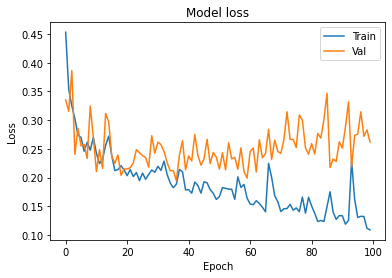

In [23]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

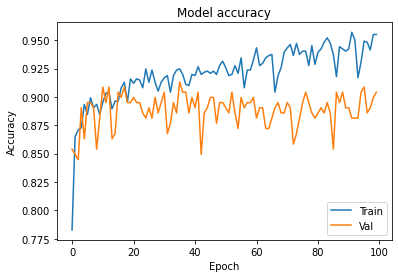

In [24]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

To address the overfitting we see in Model 2, we'll incorporate L2 regularization and dropout in our third model here (Model 3).

In [25]:
from keras.layers import Dropout
from keras import regularizers

In [26]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [27]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 45ms/step - loss: 14.2463 - accuracy: 0.6859 - val_loss: 3.9304 - val_accuracy: 0.6210
Epoch 2/100
32/32 [==============================] - 1s 35ms/step - loss: 1.6801 - accuracy: 0.8160 - val_loss: 0.6381 - val_accuracy: 0.8493
Epoch 3/100
32/32 [==============================] - 1s 35ms/step - loss: 0.5648 - accuracy: 0.8581 - val_loss: 0.4906 - val_accuracy: 0.8539
Epoch 4/100
32/32 [==============================] - 1s 37ms/step - loss: 0.5117 - accuracy: 0.8689 - val_loss: 0.4763 - val_accuracy: 0.8721
Epoch 5/100
32/32 [==============================] - 1s 38ms/step - loss: 0.5072 - accuracy: 0.8640 - val_loss: 0.4726 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 1s 36ms/step - loss: 0.4765 - accuracy: 0.8855 - val_loss: 0.4610 - val_accuracy: 0.8721
Epoch 7/100
32/32 [==============================] - 1s 35ms/step - loss: 0.4877 - accuracy: 0.8591 - val_loss: 0.4636 - val_accuracy: 0.8721
Epoch

32/32 [==============================] - 1s 35ms/step - loss: 0.4469 - accuracy: 0.8865 - val_loss: 0.4284 - val_accuracy: 0.8858
Epoch 59/100
32/32 [==============================] - 1s 35ms/step - loss: 0.4504 - accuracy: 0.8748 - val_loss: 0.4557 - val_accuracy: 0.8721
Epoch 60/100
32/32 [==============================] - 1s 35ms/step - loss: 0.4493 - accuracy: 0.8757 - val_loss: 0.4319 - val_accuracy: 0.8676
Epoch 61/100
32/32 [==============================] - 1s 35ms/step - loss: 0.4487 - accuracy: 0.8738 - val_loss: 0.4560 - val_accuracy: 0.8721
Epoch 62/100
32/32 [==============================] - 1s 35ms/step - loss: 0.4470 - accuracy: 0.8806 - val_loss: 0.4534 - val_accuracy: 0.8721
Epoch 63/100
32/32 [==============================] - 1s 34ms/step - loss: 0.4652 - accuracy: 0.8669 - val_loss: 0.5004 - val_accuracy: 0.8447
Epoch 64/100
32/32 [==============================] - 1s 33ms/step - loss: 0.4602 - accuracy: 0.8640 - val_loss: 0.4363 - val_accuracy: 0.8676
Epoch 65/100

We'll now plot the loss and accuracy graphs for Model 3. You'll notice that the loss is a lot higher at the start, and that's because we've changed our loss function. To plot such that the window is zoomed in between 0 and 1.2 for the loss, we add an additional line of code (plt.ylim) when plotting

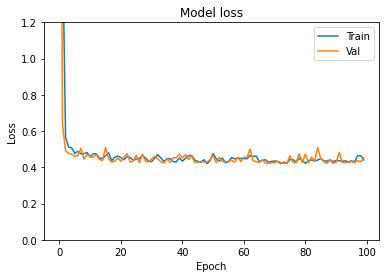

In [28]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

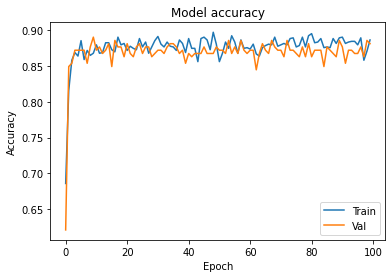

In [29]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

As compared to Model 2, you should see that there's less overfitting!

# Exercise 1
Try to change the following Hyperparameters: <br>
batch_size <br>
epochs <br>
What is your observation?

# Exercise 2
Try to change the following parameters: <br>
No. of Hideen Layers <br>
Neurons in each Hidden Layer <br>
What is your observation?